#   1. INTRODUCTION
    
    =================================================

    Milestone Phase 0

    Nama  : Stephanus Adinata Susanto

    Batch : SBY - 01

    Case study ini dibuat untuk mengetahui faktor-faktor apa saja yang mempengaruhi customer satisfaction pada industri bank
    =================================================

Link Tableau : "https://public.tableau.com/app/profile/stephanus.adinata.susanto/viz/Milestone-Tableau/Story1?publish=yes"

Refrensi dataset : 'https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn'

## Case Study - Customer Satisfaction on Bank Industry

<center><img src="https://www.bizhare.id/media/wp-content/uploads/2023/05/Thumbnail_Artikel-Media_Mengenal-Bank-Sentral-serta-Fungsi-Tugas-dan-Wewenangnya.jpg" height=216, width=384></img></center>



# 2.Business Understanding

## 2.1 Defining the problem statement

Using SMART Framework:

    1. Spesific : Mengetahui faktor-faktor apa saja yang mempengaruhi customer satisfaction

    2. Measureable : Mendapatkan minimal nilai 4 pada satifaction score

    3. Achievable: Membuat suatu inovasi menarik yang bisa meningkatkan customer satisfaction

    4. Relevant : Mempertahankan tingkat kepuasan sangat penting di dunia usaha perbankan

    5. Time Bound: Target waktu adalah 6 bulan untuk mendapatkan minimal angka 4 pada satisfaction score


## 2.2 Problem statement
    Mengetahui faktor-faktor apa saja yang mempengaruhi customer satisfaction, menargetkan kenaikan pada satisfaction score minimal menjadi 4 dalam 6 bulan ke depan. Untuk mencapai tujuan ini, bank perlu mengembangkan produk perbankan inovatif yang memiliki daya tarik bagi pelanggan yang dapat memicu kepuasan konsumen.

## 2.3 Breaking Down the Problem

    Main Problem : Mengetahui faktor-faktor apa saja yang mempengaruhi tingkat kepuasan seseorang pada dunia perbankan

    The 5W+1Hs:

        1. Berapakah distribusi data balance di bank ini? (Statistic Descriptive Central Tendency)

        2. Apakah Tenure berpengaruh terhadap customer satisfaction score? (Statistic Inferential & Visualitation)

        3. Apakah Card Type berpengaruh terhadap customer satisfaction score? (Visualitazion)

        4. Berapakah distribusi data umur nasabah? (Statistic Descriptive Central Tendency)

        5. Apakah umur seorang nasabah dapat mempengaruhi customer satisfaction score? (Visualitazion)
        
        6. Apakah orang-orang yang tidak pernah complain cenderung puas ? (Visualitation)

# 3. Data Loading

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('Customer-Churn-Records.csv')
df

#Refrensi dataset : 'https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn'

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


# 4. Data Cleaning & Manipulation

## 4.1 Data Eksploration

Sebelum melakukan data cleaning, sebaiknya memperhatikan terlebih dahulu data-data apa yang mungkin harus di cleaning/manipulasi dengan mengecek satu per satu type data, missing value, dan lainnya

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Dapat kita lihat bahwa kita memiliki 10000 dataset dan tidak terdeteksi adanya missing value dari dataset dan bisa dilihat juga bahwa tipe data yang tertera sudah sangat baik 

## 4.2 Data Manipulation

Untuk memudahkan kita dalam pengolahan data ada baiknya untuk mengubah seluruh nama judul kolom menjadi huruf kecil

In [23]:
#mengganti seluruh judul kolom menjadi huruf kecil
df = df.rename(columns=str.lower)
df

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction score,card type,point earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


Setelah menggunakan str.lower bisa dilihat judul pada kolom sudah menjadi huruf kecil semua sehingga lebih mudah untuk dilakukan pengolahan lebih lanjut

## 4.3 Data Cleaning

In [157]:
# Mengecek data duplikat
duplicate = df.duplicated()

print(df[duplicate])

Empty DataFrame
Columns: [rownumber, customerid, surname, age, tenure, balance, numofproducts, hascrcard, isactivemember, estimatedsalary, exited, complain, satisfaction score, card type, point earned, tenure2, age2]
Index: []


Dari tes duplicate di atas dapat dilihat bahwa tidak ada data duplicate sehingga data bisa diolah lebih lanjut

In [28]:
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction score,card type,point earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Dari tabel di bawah ini terdapat beberapa kolom seperti credit score,geography,gender yang tidak perlukan dalam penelitian analisis ini sehingga bisa dibuang saja agar lebih memudahkan

In [29]:
df = df.drop(columns=['geography', 'gender', 'creditscore'])
df

,rownumber,customerid,surname,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction score,card type,point earned
0,1,15634602,Hargrave,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [30]:
#Melakukan save data setelah data di clean
df.to_csv(('customer-churn-clean.csv'), index=False)

# 5. Data Analysis

In [3]:
#Melakukan loading data yang sudah di cleaning sebelumnya
df = pd.read_csv('customer-churn-clean.csv')
df

,rownumber,customerid,surname,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction score,card type,point earned
0,1,15634602,Hargrave,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


## 5.1 Measurement of Central Tendency pada Balance

In [4]:
#rata-rata, median, dan modus dari kolom Tenure(lama seseorang menjadi nasabah)
mean = df['balance'].mean()
print('Mean of balance:',mean)

median = df['balance'].median()
print('Median of balance:',median)

mode = df['balance'].mode().values[0]
print('Mode of balance:',mode)

Mean of balance: 76485.889288
Median of balance: 97198.54000000001
Mode of balance: 0.0


[Text(0.5, 1.0, 'Persebaran Data Balance')]

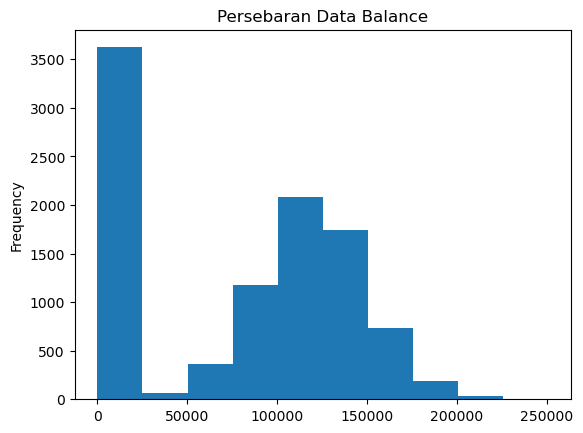

In [5]:
df['balance'].plot(kind='hist',bins=10).set(title="Persebaran Data Balance")

Dapat dilihat data Balance ternyata tidak terdistribusi secara normal karena banyak data angka 0. Rata-rata balance / uang yang ada di rekening nasabah pada penelitian ini adalah 76845.

## 5.2 Pengaruh Tenure terhadap Saticfation Score

Pada pengujian hipotesis, kita menggunakan uji chi-square karena kita menganalisis yang 2 variabel yang bersifat kategorial, seperti nilai, skor, atau ukuran, bukan variabel kategori atau biner.
Dalam kasus ini maka kita dapat menyimpulkan hipotesis sebagai berikut:

    H0 = Tenure tidak berpengaruh terhadap customer satifaction

    H1 = Tenure berpengaruh terhadap customer satisfaction score

Sebelum melakukan uji chi-square ada baiknya kita mengelompokkan data tenure agar lebih mudah diproses lebih lanjut

In [6]:
def group_tenure(tenure):
    if tenure in [0, 1, 2]:
        return '1'
    if tenure in [3, 4]:
        return '2'
    if tenure in [5, 6]:
        return '3'
    if tenure in [7, 8]:
        return '4'
    if tenure in [9, 10]:
        return '5'

df['tenure2']=df.apply(lambda row: group_tenure(row['tenure']),axis=1)
df

,rownumber,customerid,surname,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction score,card type,point earned,tenure2
0,1,15634602,Hargrave,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,1
1,2,15647311,Hill,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1
2,3,15619304,Onio,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,4
3,4,15701354,Boni,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,1
4,5,15737888,Mitchell,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,3
9996,9997,15569892,Johnstone,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,5
9997,9998,15584532,Liu,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,4
9998,9999,15682355,Sabbatini,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,2


Dapat dilihat terdapat kolom baru bernama tenure 2 yang merupakan data kategorial dari kolom tenure, setelah ini dapat dilakukan penghitungan pengujian hipotesis chi square

Untuk mengetahui value dari kategori tenure maka langkah selanjutnya adalah

In [7]:
a = [1,2,3,4,5]
b = ['<= 2 tahun', '2 - 4 tahun', '5 - 6 tahun', '7 - 8 tahun', '> 8 tahun']

df_tenure = pd.DataFrame({'kategori':a,  'tenure':b})
df_tenure

,kategori,tenure
0,1,<= 2 tahun
1,2,2 - 4 tahun
2,3,5 - 6 tahun
3,4,7 - 8 tahun
4,5,> 8 tahun


In [8]:
contingency_table1 = pd.crosstab(df['tenure2'],df['satisfaction score'])
contingency_table1

satisfaction score,1,2,3,4,5
tenure2,,,,,
1,510,494,504,477,511
2,391,414,396,388,409
3,364,390,406,434,385
4,395,440,402,423,393
5,272,276,334,286,306


In [9]:
res = stats.chi2_contingency(contingency_table1)
print("P-value:",res.pvalue)

P-value: 0.2549221482899978


[Text(0.5, 1.0, 'Tenure on Satisfaction Score')]

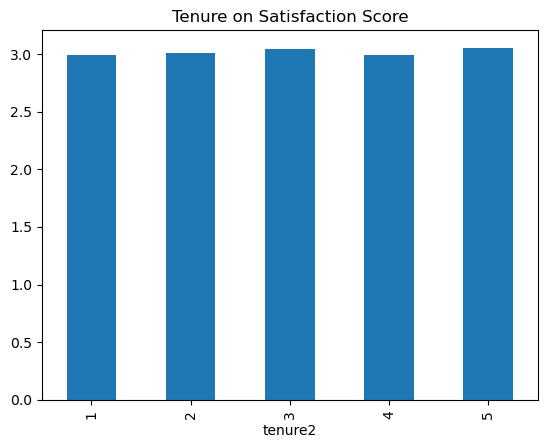

In [10]:
df.groupby(['tenure2'])['satisfaction score'].mean().plot(kind='bar').set(title="Tenure on Satisfaction Score")

Dari perhitungan uji chi-square di atas memperlihatkan bahwa nilai p-value > 0,05 (alpha), maka dapat disimpulkan Tenure seorang nasabah tidak berpengaruh terhadap customer satisfaction score. Perhitungan tersebut dikuatkan juga dengan hasil plot bar yang tertera, dimana semua kategori tenure cenderung menjawab angka netral pada satisfaction score

## 5.3 Pengaruh Card Type terhadap Satisfaction Score

Pada pengujian hipotesis, kita menggunakan uji ANOVA karena kita menganalisis yang bersifat kuantitatif (numerik), seperti nilai, skor, atau ukuran, bukan variabel kategori atau biner.
Dalam kasus ini maka kita dapat menyimpulkan hipotesis sebagai berikut:

    H0 = Card Type tidak berpengaruh terhadap customer satifaction

    H1 = Card Type berpengaruh terhadap customer satisfaction score

In [11]:
diamond = df['satisfaction score'][(df['card type']=='DIAMOND') | (df['card type']=='Diamond')]
gold = df['satisfaction score'][(df['card type']=='GOLD') | (df['card type']=='Gold')]
silver = df['satisfaction score'][(df['card type']=='SILVER') | (df['card type']=='Silver')]
platinum = df['satisfaction score'][(df['card type']=='PLATINUM') | (df['card type']=='Platinum')]

In [12]:
res = stats.f_oneway(diamond, gold, silver, platinum)
print('P-value:',res.pvalue)

P-value: 0.6211167335621035


<Axes: xlabel='card type'>

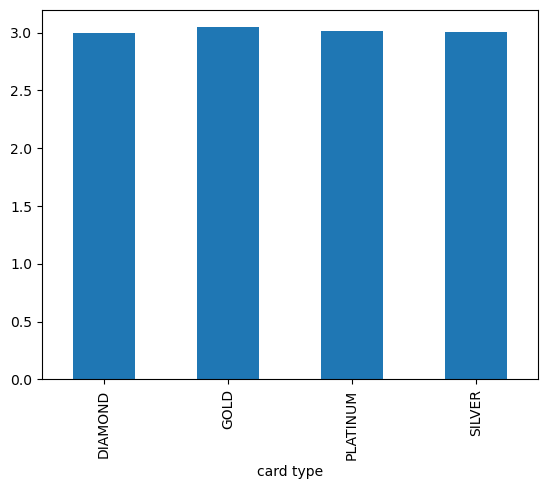

In [13]:
df.groupby(['card type'])['satisfaction score'].mean().plot(kind='bar')

Dari perhitungan uji ANOVA di atas memperlihatkan bahwa nilai p-value > 0,05 (alpha), maka dapat disimpulkan Card Type seorang nasabah tidak berpengaruh terhadap customer satisfaction score. Perhitungan tersebut dikuatkan juga dengan hasil plot bar yang tertera, dimana semua pemegang jenis kartu (diamond,gold,platinum,silver) cenderung menjawab angka netral pada satisfaction score

## 5.4 Measurement of Central Tendency pada Umur

Untuk mengetahui distribusi persebaran data pada kolom Age, dapat dilakukan dengan cara sebagai berikut

In [14]:
#rata-rata, median, dan modus dari kolom Tenure(lama seseorang menjadi nasabah)
mean = df['age'].mean()
print('Mean of age:',mean)

median = df['age'].median()
print('Median of age:',median)

mode = df['age'].mode().values[0]
print('Mode of age:',mode)

Mean of age: 38.9218
Median of age: 37.0
Mode of age: 37


Bisa dilihat bahwa rata-rata umur nasabah dalam data adalah selama 38 tahun, dan sebagian besar umur nasabah adalah sebesar 37 tahun

Untuk memudahkan penelitian maka kolom umur akan dikelompokkan dengan cara berikut:

In [15]:
df['age'].min()

18

In [16]:
df['age'].max()

92

Dari perhitungan max dan min dapat dilihat data umur yang paling kecil ada 18 tahun dan yang besar 92, maka langkah selanjutnya kita membuat fungsi sebagai berikut:

In [18]:
def group_age(age):
    if age <= 18:
        return '1'
    elif age <= 28:
        return '2'
    elif age <= 38:
        return '3'
    elif age <= 48:
        return '4'
    elif age <= 58:
        return '5'
    elif age <= 68:
        return '6'
    elif age <= 78:
        return '7'
    elif age <= 88:
        return '8'               
    else:
        return '9'

df['age2']=df.apply(lambda row: group_age(row['age']),axis=1)
df

,rownumber,customerid,surname,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction score,card type,point earned,tenure2,age2
0,1,15634602,Hargrave,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,1,4
1,2,15647311,Hill,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1,4
2,3,15619304,Onio,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,4,4
3,4,15701354,Boni,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,1,4
4,5,15737888,Mitchell,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,3,4
9996,9997,15569892,Johnstone,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,5,3
9997,9998,15584532,Liu,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,4,3
9998,9999,15682355,Sabbatini,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,2,4


Setelah menjalankan fungsi di atas maka bisa kolom baru pengelompokkan umur sudah terbuat ('age2')

Untuk melihat distribusi data pada kolom 'age2' :

In [19]:
df['age2'].value_counts()

3    4271
4    2894
2    1271
5     954
6     415
7     154
1      22
8      17
9       2
Name: age2, dtype: int64

In [20]:
    a = [1,2,3,4,5,6,7,8,9]
    b = ['<= 18 tahun', '19 - 28 tahun', '29 - 38 tahun', '39 - 48 tahun', '49 - 58 tahun', '59 - 68 tahun', '69 - 78 tahun', '79 - 88 tahun', '>88 tahun',]

df_age = pd.DataFrame({'kategori':a,  'usia':b})
df_age

,kategori,usia
0,1,<= 18 tahun
1,2,19 - 28 tahun
2,3,29 - 38 tahun
3,4,39 - 48 tahun
4,5,49 - 58 tahun
5,6,59 - 68 tahun
6,7,69 - 78 tahun
7,8,79 - 88 tahun
8,9,>88 tahun


Tabel di atas merupakan pentunjuk usia yang telah dikelompokkan sebelumnya, tujuan dibuat tabel ini adalah untuk memperjelas dan memudahkan dalam membaca data pada kolom 'age2'

[Text(0.5, 1.0, 'Persebaran Data Usia')]

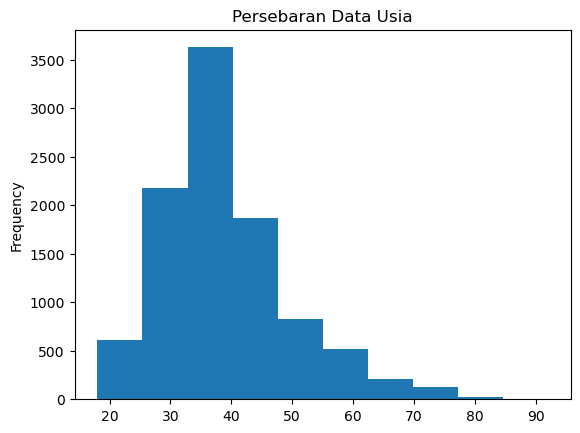

In [21]:
df['age'].plot(kind='hist',bins=10).set(title='Persebaran Data Usia')

Dari histogram di atas bisa diketahui bahwa kelompok umur yang dominan adalah kelompok 3 yaitu nasabah yang berusia antara 29-38 tahun

## 5.5 Pengaruh Umur terhadap Satisfaction Score

Pada pengujian hipotesis, kita menggunakan uji chi-square karena kita menganalisis yang 2 variabel yang bersifat kategorial, seperti nilai, skor, atau ukuran, bukan variabel kategori atau biner.
Dalam kasus ini maka kita dapat menyimpulkan hipotesis sebagai berikut:

    H0 = Umur seorang nasabah tidak berpengaruh terhadap customer satifaction

    H1 = Umur seorang nasabah berpengaruh terhadap customer satisfaction score

In [22]:
df.head()

,rownumber,customerid,surname,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction score,card type,point earned,tenure2,age2
0,1,15634602,Hargrave,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,1,4
1,2,15647311,Hill,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1,4
2,3,15619304,Onio,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,4,4
3,4,15701354,Boni,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,1,4
4,5,15737888,Mitchell,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,1,4


Dapat dilihat terdapat kolom baru bernama age2 yang merupakan data kategorial dari kolom age, setelah ini dapat dilakukan penghitungan pengujian hipotesis chi square

In [23]:
contingency_table2 = pd.crosstab(df['age2'],df['satisfaction score'])
contingency_table2

satisfaction score,1,2,3,4,5
age2,,,,,
1,4,2,5,3,8
2,221,255,272,252,271
3,853,874,886,852,806
4,542,587,569,579,617
5,181,192,195,208,178
6,99,68,76,85,87
7,28,31,34,26,35
8,4,5,4,3,1
9,0,0,1,0,1


In [24]:
res = stats.chi2_contingency(contingency_table2)
print("P-value:",res.pvalue)

P-value: 0.322558659541927


[Text(0.5, 1.0, 'Age on Satisfaction Score')]

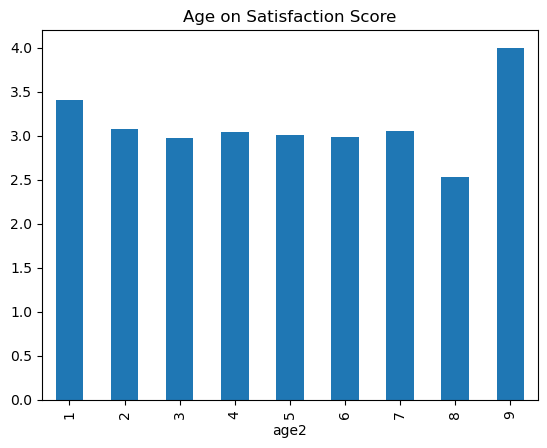

In [25]:
df.groupby(['age2'])['satisfaction score'].mean().plot(kind='bar').set(title="Age on Satisfaction Score")

Dari perhitungan uji chi-square di atas memperlihatkan bahwa nilai p-value > 0,05 (alpha), maka dapat disimpulkan umur seorang nasabah tidak berpengaruh terhadap customer satisfaction score. Perhitungan tersebut dikuatkan juga dengan hasil plot bar yang tertera, dimana semua kategori umur cenderung menjawab angka netral pada satisfaction score.

Untuk mengetahui distribusi persebaran data pada kolom Tenure, dapat dilakukan dengan cara sebagai berikut

## 5.6 Pengaruh Complain terhadap Customer Satisfaction Score

Pada pengujian hipotesis, kita menggunakan uji chi square karena kita menganalisis 2 variabel dengan tipe kategorial.
Dalam kasus ini maka kita dapat menyimpulkan hipotesis sebagai berikut:

    H0 = Complain tidak berpengaruh terhadap customer satifaction

    H1 = Complain berpengaruh terhadap customer satisfaction score

Setelah menentukan hipotesis, perhitungan chi-square bisa dilakukan lebih lanjut

In [26]:
df['complain'].value_counts()

0    7956
1    2044
Name: complain, dtype: int64

In [27]:
a = [0,1]
b = ['no', 'yes']

df_complain = pd.DataFrame({'kategori':a,  'Pernah Melakukan Complain?':b})
df_complain

,kategori,Pernah Melakukan Complain?
0,0,no
1,1,yes


Tabel di atas merupakan pentunjuk tentang kolom complain yang telah dikelompokkan sebelumnya, tujuan dibuat tabel ini adalah untuk memperjelas dan memudahkan dalam membaca data pada kolom complain

In [28]:
contingency_table = pd.crosstab(df['complain'],df['satisfaction score'])
contingency_table

satisfaction score,1,2,3,4,5
complain,,,,,
0,1545,1576,1636,1595,1604
1,387,438,406,413,400


In [29]:
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.5559756516610992


[Text(0.5, 1.0, 'Complain on Satisfaction Score')]

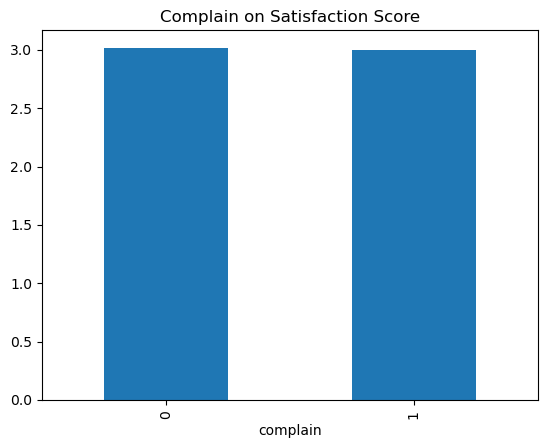

In [30]:
df.groupby(['complain'])['satisfaction score'].mean().plot(kind='bar').set(title="Complain on Satisfaction Score")

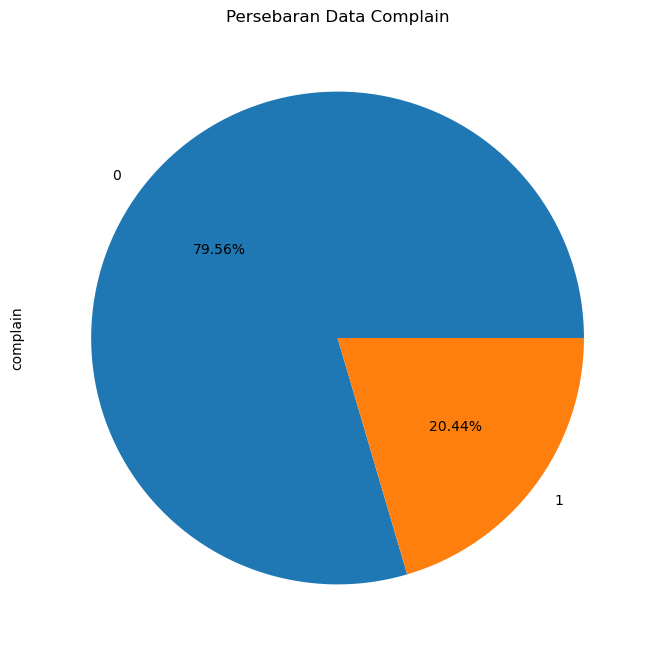

In [31]:
fig,ax1 = plt.subplots(figsize=(8,8))

df['complain'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1).set(title='Persebaran Data Complain')
plt.show()

Dari perhitungan uji chi-square di atas memperlihatkan bahwa nilai p-value > 0,05 (alpha), maka dapat disimpulkan apakah seorang nasabah pernah melakukan complain / tidak ternyata tidak berpengaruh terhadap customer satisfaction score. Perhitungan tersebut dikuatkan juga dengan hasil plot bar yang tertera, dimana semua nasabah yang tidak pernah (79,56%) maupun pernah melakukan complain(20,44) cenderung menjawab angka netral pada satisfaction score

# 6.Conclusion

Dari semua perhitungan di atas dapat diketahui bahwa Tenure,Card Type, dan umur seorang nasabah tidak berpengaruh terhadap customer satisfaction begitu juga tingkat komplain, Maka untuk dapat meningkatkan customer satisfaction, dibutuhkan faktor-faktor lain yang bisa berpengaruh antara lain:

    1. Service Quality : Karena perbankan merupakan industri yang sangat berhubungan erat dengan jasa, maka service quality merupakan faktor yang sangat penting dalam mempengaruhi customer satisfaction. Parasuraman, Zeithaml, dan Berry dalam jurnal penelitian mereka yang berjudul "A Conceptual Model of Service Quality and Its Implications for Future Research" pada tahun 1985 telah menyelidiki bahwa ketika kualitas layanan meningkat, maka pelanggan cenderung lebih puas dengan pengalaman mereka. 

    2.  Keamanan adalah salah satu faktor kunci yang berpengaruh besar terhadap kepuasan konsumen di industri perbankan. Keamanan mengacu pada perlindungan dana dan data pelanggan, serta rasa percaya konsumen terhadap bank mereka. Penilitian yang dilakukan Nandya Eka Sari dan Teddy Oswari pada tahun 2020 dengan judul "Pengaruh kemudahan, kepercayaan, dan keamanan terhadap kepuasan pelanggan melalui keputusan pembeleian pada toko online tokopedia", mereka menemukan bahwa adanya pengaruh yang signifikan dari keamanan terhadap customer satisfaction.

Dengan menerapkan dan mengimplentasikan 2 faktor yang telah dijabarkan diatas dengan baik, customer satisfaction dapat meningkat karena dalam persaingan bebas dewasa ini mempertahankan konsumen sama pentingnya dengan mencari konsumen baru